# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [ ]:
# Add code here 🔧

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Inport cleaned data
df = pd.read_csv('cleaned_airbnb_data.csv')
display(df.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65
3,6448,https://www.airbnb.com/rooms/6448,20250613040113,2025-06-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,NaN,t,1,1,0,0,2.02
4,8502,https://www.airbnb.com/rooms/8502,20250613040113,2025-06-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.69,4.63,NaN,f,1,1,0,0,0.29


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



In [ ]:
# Add code here 🔧

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.021100e+04,1.021000e+04,1.021000e+04,10208.000000,10208.000000,10210.000000,0.0,10210.000000,10210.000000,10210.000000,...,8655.000000,8656.000000,8654.000000,8654.000000,0.0,10210.000000,10210.000000,10210.000000,10210.000000,8656.000000
mean,2.869546e+17,2.025061e+13,1.299407e+08,86.383915,123.234130,78723.797845,NaN,30.278732,-97.750651,4.851126,...,4.914285,4.915548,4.842651,4.792825,NaN,7.514887,5.512831,0.985113,0.493732,1.266762
std,3.834563e+17,3.890816e+00,1.578072e+08,477.611913,654.187515,20.790233,NaN,0.062451,0.062660,3.328310,...,0.235156,0.232191,0.253446,0.296454,NaN,17.244720,13.680143,3.985498,5.388230,1.601547
min,5.456000e+03,2.025061e+13,2.300000e+01,1.000000,1.000000,78701.000000,NaN,30.078440,-98.053350,1.000000,...,1.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.050326e+07,2.025061e+13,1.239949e+07,1.000000,1.000000,78703.000000,NaN,30.242791,-97.768537,2.000000,...,4.920000,4.910000,4.800000,4.740000,NaN,1.000000,1.000000,0.000000,0.000000,0.140000
50%,4.629372e+07,2.025061e+13,5.441565e+07,2.000000,3.000000,78723.000000,NaN,30.268415,-97.741995,4.000000,...,4.980000,4.980000,4.910000,4.860000,NaN,1.000000,1.000000,0.000000,0.000000,0.620000
75%,7.065468e+17,2.025061e+13,1.961854e+08,6.000000,9.000000,78745.000000,NaN,30.304970,-97.718222,6.000000,...,5.000000,5.000000,5.000000,4.950000,NaN,4.000000,3.000000,0.000000,0.000000,1.890000
max,9.892377e+17,2.025061e+13,7.006501e+08,4889.000000,6397.000000,78759.000000,NaN,30.518350,-97.559300,16.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,116.000000,116.000000,34.000000,60.000000,23.080000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10211 entries, 0 to 10210
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10211 non-null  int64  
 1   listing_url                                   10211 non-null  object 
 2   scrape_id                                     10210 non-null  float64
 3   last_scraped                                  10210 non-null  object 
 4   source                                        10210 non-null  object 
 5   name                                          10210 non-null  object 
 6   description                                   9932 non-null   object 
 7   neighborhood_overview                         6509 non-null   object 
 8   picture_url                                   10209 non-null  object 
 9   host_id                                       10210 non-null 

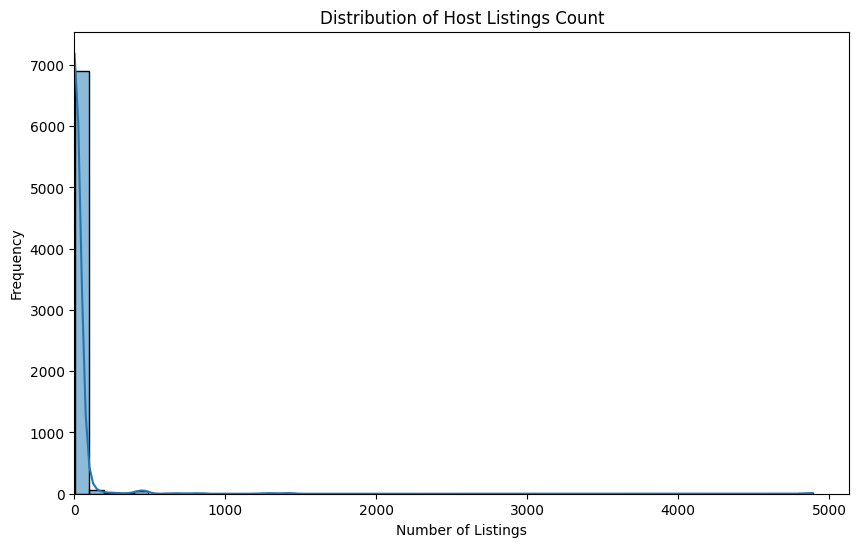

In [5]:
# Chose the column: host_listings_counts
plt.figure(figsize=(10, 6))
sns.histplot(df['host_listings_count'].dropna(), bins=50, kde=True)
plt.title('Distribution of Host Listings Count')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.xlim(0,) # Set the x-axis limit to start at 0
plt.show()

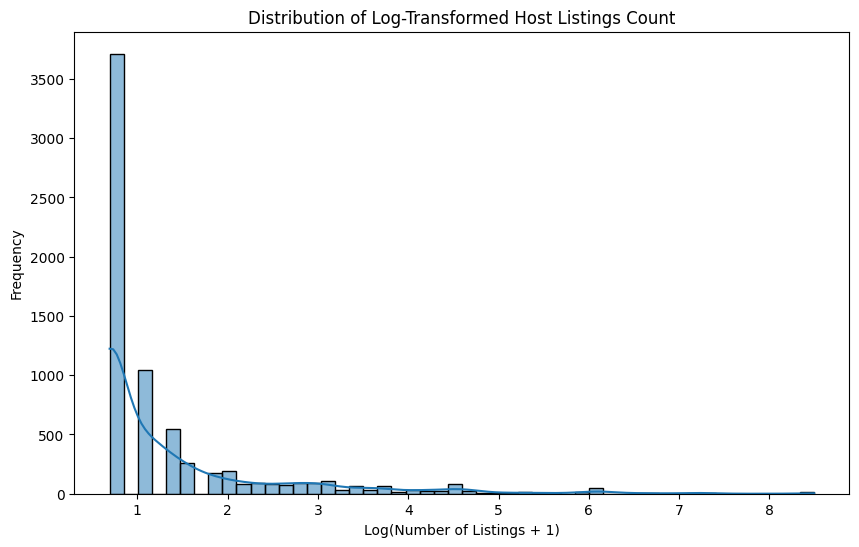

In [7]:
# Apply log transformation to 'host_listings_count'
# Add 1 before taking log to handle 0 values (log(0) is undefined)
df['host_listings_count_log'] = np.log1p(df['host_listings_count'])

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['host_listings_count_log'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Host Listings Count')
plt.xlabel('Log(Number of Listings + 1)')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧
1. I examined the hose_listings_count column.

What transformation did you try, and why?
How did the transformed version help make the data more usable for analysis or stakeholder review?

2. I used the log scaling trasnformation because the graph was very heavily skewed right.

3. The transformed histogram improved data usability for analysis by reducing the right skew.The log function affected the outliers which resulted in a more normally distributed chart . For stakeholders, using the log function makes it easier to interpret the number of listings, allowing them to make better, more informed decisions.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [ ]:
#min max: estimated_revenue_l365d
#z-score: minimum_nights

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select the columns for scaling
col_revenue = 'estimated_revenue_l365d'
col_min_nights = 'minimum_nights'

# Handle missing values before scaling - fill with median for simplicity
df[col_revenue] = df[col_revenue].fillna(df[col_revenue].median())
df[col_min_nights] = df[col_min_nights].fillna(df[col_min_nights].median())

# Min-Max scale 'estimated_revenue_l365d'
scaler_minmax = MinMaxScaler()
df[f'{col_revenue}_minmax_scaled'] = scaler_minmax.fit_transform(df[[col_revenue]])

# Z-score scale 'minimum_nights'
scaler_standard = StandardScaler()
df[f'{col_min_nights}_zscore_scaled'] = scaler_standard.fit_transform(df[[col_min_nights]])

# Display the original and scaled columns to verify
display(df[[col_revenue, f'{col_revenue}_minmax_scaled', col_min_nights, f'{col_min_nights}_zscore_scaled']].head())

,estimated_revenue_l365d,estimated_revenue_l365d_minmax_scaled,minimum_nights,minimum_nights_zscore_scaled
0,16362.0,0.006817,2.0,-0.189455
1,1350.0,0.000562,1.0,-0.217951
2,9660.0,0.004025,30.0,0.608439
3,13950.0,0.005812,3.0,-0.160958
4,344.0,0.000143,4.0,-0.132462


### ✍️ Your Response: 🔧
1. I scaled the estimated_revenue_l365d and minimum_nights columns. I used the MinMaxScaler for estimated_revenue_l365d and I used Z- Score noramlization for minimum_nights.
2. Using the MinMaxScaler on estimated_revenue_l365d, it is benificial because it levels the playing feild and it is very useful for machine learning models. Using Z- Score noramlization on minimum_nights is important for algorithms sensitive to the scale as well as varience.
3. Airbnb, the people that will benifit from this transfomation most are data scientists and or data analysts. They wouldd benifit because these transfimations allow columns to not have dispreportinate results that might influence the overall results.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [ ]:
# Add code here 🔧

In [7]:
# Group 'availability_30' into 4 bins: Very Low, Low, Medium, High
df['availability_30_category'] = pd.cut(df['availability_30'], bins=4, labels=['Very Low', 'Low', 'Medium', 'High'])

# Display the value counts of the new categorical column in order
display(df['availability_30_category'].value_counts().reindex(['Very Low', 'Low', 'Medium', 'High']))

# Display the head of the DataFrame with the new column
display(df[['availability_30', 'availability_30_category']].head())

,count
availability_30_category,
Very Low,6651
Low,1990
Medium,2155
High,4391


,availability_30,availability_30_category
0,30,High
1,4,Very Low
2,0,Very Low
3,10,Low
4,18,Medium


### ✍️ Your Response: 🔧
1. I grouped the availability_30 category and I used 4 categories. I tried 3 categories but I wanted to separate the low values since there were so many.
2. Some people might prefer these grouped categories because it's much easier and simpler to read. It also allows you to find a target goal, for example if there were a lot of listings within the high avalibility you would want to decrease that number.
3. This would help the marketing team at Airbnb because they can use these groupings to premote campaigns to help book those high availability listings.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [11]:
# Create a flag for long-term stays (e.g., minimum_nights > 7)
df['long_term_stay'] = (df['minimum_nights'] > 7)

# Display the value counts of the new flag column
display(df['long_term_stay'].value_counts())

# Display the head of the DataFrame with the new column
display(df[['minimum_nights', 'long_term_stay']].head())

,count
long_term_stay,
False,12938
True,2249


,minimum_nights,long_term_stay
0,2,False
1,1,False
2,30,True
3,3,False
4,4,False


In [13]:
# Ensure 'price_numeric' exists (created earlier by removing '$' and ',')
if 'price_numeric' not in df.columns:
     df['price_numeric'] = df['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)

# Create the 'cost_per_person' column (price / accommodates)
# Handle potential division by zero if accommodates is 0 or missing
# Replace 0 or NaN in accommodates with NaN to avoid division issues
df['accommodates_cleaned'] = df['accommodates'].replace(0, np.nan) # Replace 0 with NaN
df['cost_per_person'] = df['price_numeric'] / df['accommodates_cleaned']

# Drop the intermediate column if desired
# df = df.drop(columns=['accommodates_cleaned'])

# Display the head of the DataFrame with the new column
display(df[['price', 'accommodates', 'cost_per_person']].head())

,price,accommodates,cost_per_person
0,$101.00,3,33.666667
1,$45.00,2,22.500000
2,NaN,2,NaN
3,$155.00,2,77.500000
4,$43.00,2,21.500000


### ✍️ Your Response: 🔧 🔧
1. I created a flag column to flag long term stays and I created a ratio column by taking the price and dividing it by the number of people staying.
2. Hosts could use the long_term_stay flag to find how many other listings in their area accommodate long-term stays and use this information to get a competitive advantage. The platform (Airbnb) could use the price per person column to obtimize their dynamic pricing algorithms.
3. This can help with dicision making for the platfom and hosts by improving pricing accuracy and helping identify target audiences more effectively.

## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [ ]:
# Add code here 🔧

In [20]:
# Reload the original dataframe to ensure all columns are present
df = pd.read_csv('cleaned_airbnb_data.csv')

# Choose the categorical column to encode
categorical_column_host = 'host_neighbourhood'

# Apply one-hot encoding
# get_dummies will create new columns for each unique category in 'host_neighbourhood'
df_encoded = pd.get_dummies(df, columns=[categorical_column_host], prefix=categorical_column_host, dummy_na=False)

# Display the head of the original and encoded columns to see the result
# Display the first few rows showing the original column and the new one-hot encoded columns
display(df[[categorical_column_host]].head())
display(df_encoded.filter(like=categorical_column_host).head())

# You can see the number of new columns created
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after one-hot encoding: {df_encoded.shape}")

# Update df to df_encoded to include the new columns
df = df_encoded

,host_neighbourhood
0,East Downtown
1,SW Williamson Co.
2,Travis Heights
3,Zilker
4,East Riverside


,host_neighbourhood_Academy Acres North,host_neighbourhood_Acres Home,host_neighbourhood_Allandale,host_neighbourhood_Allendale,host_neighbourhood_Alphabet City,host_neighbourhood_Alta Mira,host_neighbourhood_American University Park,host_neighbourhood_Anaheim,host_neighbourhood_Anaheim Resort,host_neighbourhood_Anastasia,...,host_neighbourhood_Woods Of Brushy Creek,host_neighbourhood_Woods Of Century Park,host_neighbourhood_Woods Of Westlake Heights,host_neighbourhood_Wooten,host_neighbourhood_Yacht Harbor,host_neighbourhood_Zephyr Cove,host_neighbourhood_Zilker,host_neighbourhood_Zona Centro,host_neighbourhood_Zona Hotelera,host_neighbourhood_Zona Romántica
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Original shape: (15187, 79)
Shape after one-hot encoding: (15187, 811)


### ✍️ Your Response: 🔧
1. I used the host_neighborhood column for the one-hot encoding method because it was a categoical variable that has many neighborhoods around Austin.
2. I used the one-hot encoding method because it was a categorical data column and it was an unordered category.
3. This transformation could help as a pricing model because it could tell us how a location (neighborhood) could determine pricing or booking rates. While the one-hot encoding isn't neciesarily helpful in condensing the data system it allows for the categorical data to be put in a format that is useable.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The transformation step that felt most intresting was scaling using the MinMaxSacler and the Z- Score normalization because it essentially put the data on a even playing feild of you were to do it with muliple categories.
2. Binning would be most helpful to a host because they are able to esily group listings or customers together and then make a plan to optimze their revenue.
3. If I was goint ot build a tool I would prepare the data further for a specific task. I would make sure all the data in that specific task was transformed using tools like scaling, encoding categorical data, etc.
4. The data transformation techniques used in this assignment closely align with both of my learning outcomes. They show how data transformation techniques like scaling, binning, and creating ratio variables can be applied to optimize supply chain sustainability and structure data for solving real-world sustainability challenges.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_07_LastnameFirstname.ipynb"